In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
df = pd.read_csv("csv/condo_data.csv")
df.head()

,size_sqrft,sold_price
0,743,480000
1,499,521990
2,499,419990
3,549,470000
4,813,640000


In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [23]:
X

array([[743],
       [499],
       [499],
       [549],
       [813],
       [599],
       [600],
       [624],
       [760],
       [657]])

In [24]:
y

array([480000, 521990, 419990, 470000, 640000, 511000, 505000, 567500,
       580000, 582500])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
print(regressor.intercept_)

335293.3549485933


In [28]:
print(regressor.coef_)

[313.85585374]


In [42]:
regressor.predict([[500]])

array([492221.28181831])

In [43]:
model_reg = regressor

In [8]:
model = linear_model.LinearRegression()
model.fit(df[['size_sqrft']],df.sold_price)

LinearRegression()

In [9]:
model.coef_

array([412.52760793])

In [10]:
model.intercept_

266131.73829216376

In [11]:
model.predict([[500]])

/usr/local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([472395.54225546])

In [12]:
import pickle

In [38]:
with open('model_pickle','wb') as f:
    pickle.dump(model_reg,f)

In [39]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [40]:
mp.predict([[500]])

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [16]:
import joblib as jb

In [44]:
jb.dump(model_reg,'model_joblib')

['model_joblib']

In [45]:
mj = jb.load('model_joblib')

In [46]:
mj.predict([[500]])

array([492221.28181831])

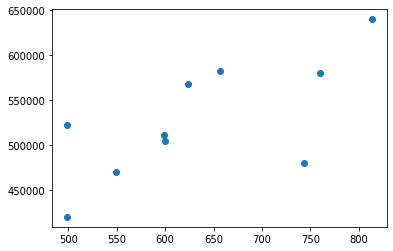

In [41]:
scatter(df["size_sqrft"], df["sold_price"])

In [17]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df["size_sqrft"], df["sold_price"])


In [18]:
r_value ** 2

0.47729132840685423

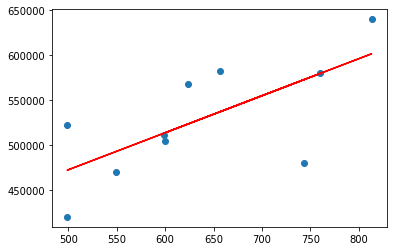

In [23]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(df["size_sqrft"])

plt.scatter(df["size_sqrft"], df["sold_price"])
plt.plot(df["size_sqrft"], fitLine, c='r')
plt.show()

In [21]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 1.0.2
